### Auto Regression

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/AirPassengers.csv")
df = df.rename(columns={"#Passengers": "Passengers"})
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: >

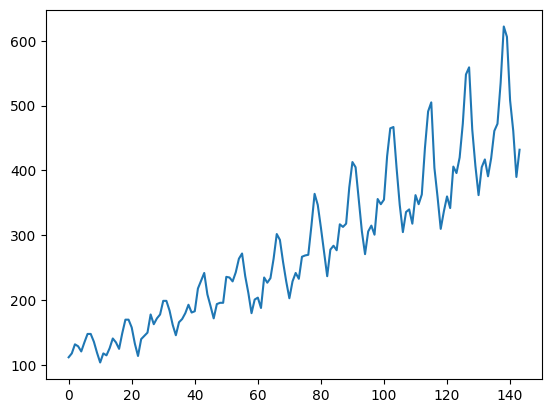

In [4]:
df["Passengers"].plot()

<Axes: >

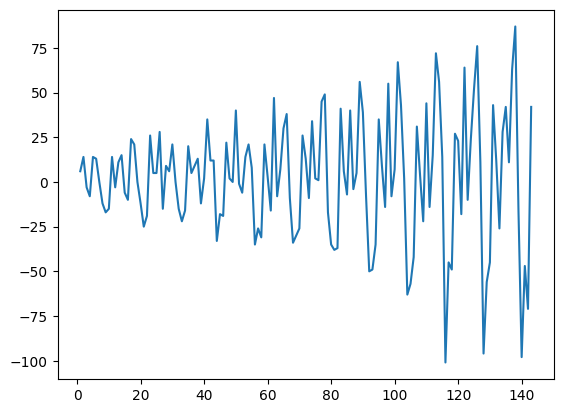

In [5]:
df['Passengers_diff1'] = df['Passengers'] - df['Passengers'].shift(1) 

df['Passengers_diff1'].plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print("p-value : {}".format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject null hypothesis, indicating that data is stationary")
    else:
        print("Weak evidence against the null hypothesis, accept null hypothesis, indicating that data is non stationary")

In [9]:
adf_test(df["Passengers_diff1"].dropna())

p-value : 0.05421329028382497
Week evidence against the null hypothesis, accept null hypothesis, indicating that data is non stationary


<Axes: >

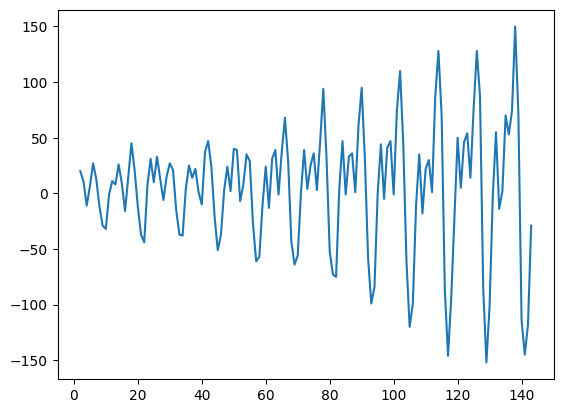

In [10]:
df['Passengers_diff2'] = df['Passengers'] - df['Passengers'].shift(2) 

df['Passengers_diff2'].plot()

In [11]:
adf_test(df["Passengers_diff2"].dropna())

p-value : 0.03862975767698849
Strong evidence against the null hypothesis, reject null hypothesis, indicating that data is stationary


In [22]:
df_pas = df["Passengers_diff2"]

train = df_pas[:len(df_pas)-7]
test = df_pas[len(df_pas)-7:]

In [23]:
from statsmodels.tsa.ar_model import AutoReg

ar = AutoReg(df_pas.dropna(), lags = 1).fit()

d:\ML_Practicals\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


d:\ML_Practicals\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


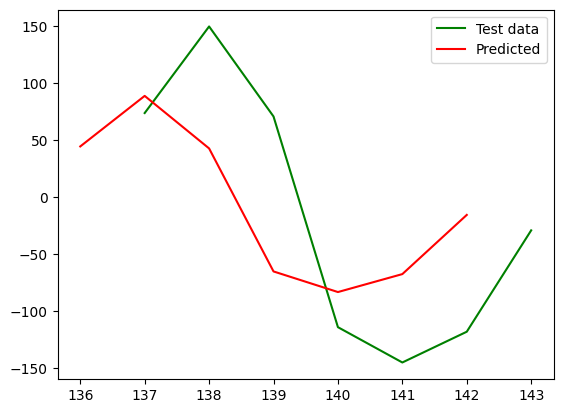

In [25]:
import matplotlib.pyplot as plt

pred = ar.predict(start = 136, end = 142)

plt.plot(test, label = 'Test data', color = 'green')
plt.plot(pred, label = 'Predicted', color = 'red')
plt.legend()